## Import Data

In [1]:
import re
import emoji
import pandas as pd
import numpy as np

data = pd.read_excel('dataset.xlsx')
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,kenapa hanya ustadz kenapa bukan guru yang tid...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak mengerti...
3,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang benar berjuang ga menyera...
4,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yang di ba...
...,...,...,...,...,...,...
3823,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas sudah tenang dia cerita kalau dia sudah bi...
3824,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all disini aku mau minta tolon...
3825,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,tahu mental health issues ada yang tahu ga kal...
3826,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi kita yang paling keras teria...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datetime     3828 non-null   object
 1   Username     3828 non-null   object
 2   Like Counts  3828 non-null   int64 
 3   Tweet        3828 non-null   object
 4   Class        3828 non-null   object
 5   cleanText    3828 non-null   object
dtypes: int64(1), object(5)
memory usage: 179.6+ KB


## Preprocessing

In [3]:
data = data[data.Class != '-']

In [4]:
slang_words = {"amp": "dan", "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "skg": "sekarang", "skrg": "sekarang", "skrng": "sekarang", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkwk": "tertawa","wkwk": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "bundir": "bunuh diri"}

In [5]:
def apply_abbreviations(text):
    words = text.split()
    abbreviated_words = [slang_words.get(word, word) for word in words]
    return ' '.join(abbreviated_words)

In [6]:
def cleanTweets(text):
    text = re.sub(r'@\w+', '', text) 
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('#','',text)
    text = re.sub('\d+', '', text)
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text
data['cleanText'] = data['Tweet'].apply(cleanTweets) 
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,knp hanya ustadz knp bkn guru yg tdk cukup me...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak ngerti a...
3,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang bener berjuang ga meny...
4,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yg di band...
...,...,...,...,...,...,...
3823,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas udah tenang dia cerita kalo dia udah bias...
3824,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all disini aku mau minta tol...
3825,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,tw mental health issues ada yang tau ga kal...
3826,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi kita yg paling keras teriak ...


In [7]:
data['cleanText'] = data['cleanText'].apply(apply_abbreviations)

## Target Class Distribution (Data Original)

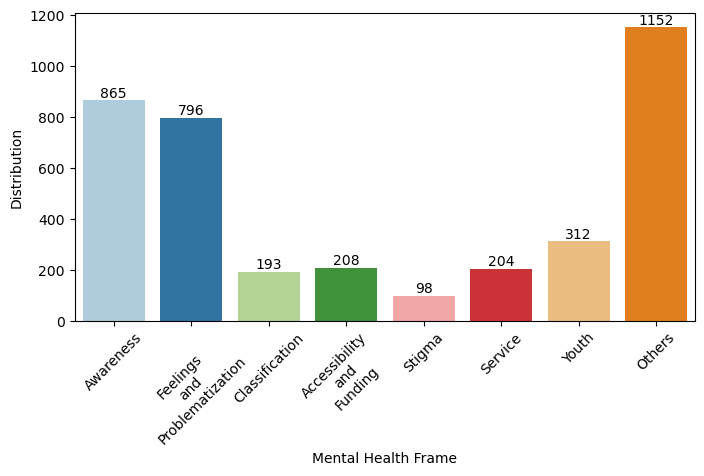

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
frame = ['Awareness', 'Feelings\nand\nProblematization', 'Classification', 'Accessibility\nand\nFunding',
        'Stigma', 'Service', 'Youth', 'Others']
ax = sns.countplot(x=data['Class'], order=['Awareness', 'Feelings and Problematization', 'Classification', 'Accessibility and Funding',
                                            'Stigma', 'Service', 'Youth', 'Others'], palette=sns.color_palette('Paired'))
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(frame)
plt.xticks(rotation=45)
plt.ylabel('Distribution')
plt.xlabel('Mental Health Frame')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [10]:
data['New Class'] = [0 if each == 4 else 1 for each in data['Class']]

### Target Class Distribution (2 Class, Others and No Others)

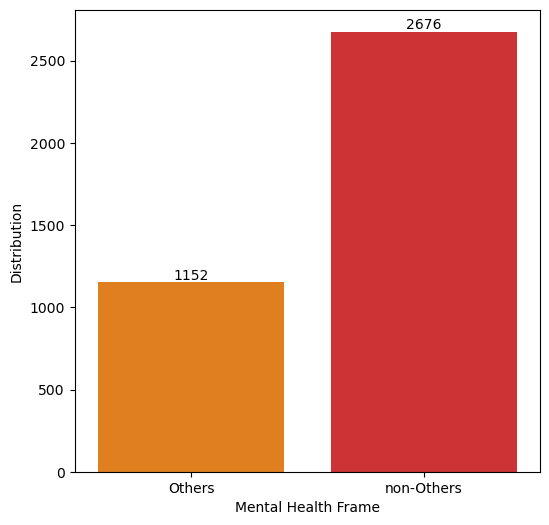

In [11]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x=data['New Class'], palette=['#ff7f00', '#e41a1c'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(('Others', 'non-Others'))
plt.ylabel('Distribution')
plt.xlabel('Mental Health Frame')
plt.show()

## Bag of Words 

In [12]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [13]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(max_sequence_length,), dtype='int32'))
model.add(tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 16))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 16)            178432    
                                                                 
 flatten (Flatten)           (None, 928)               0         
                                                                 
 dense (Dense)               (None, 1)                 929       
                                                                 
Total params: 179361 (700.63 KB)
Trainable params: 179361 (700.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from sklearn.model_selection import train_test_split

train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['New Class']), test_size=0.1, random_state=43)

In [17]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/10
108/108 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7001 - val_loss: 0.6463 - val_accuracy: 0.6684
Epoch 2/10
108/108 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7033 - val_loss: 0.6203 - val_accuracy: 0.6684
Epoch 3/10
108/108 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7086 - val_loss: 0.5983 - val_accuracy: 0.6684
Epoch 4/10
108/108 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.7985 - val_loss: 0.5744 - val_accuracy: 0.6789
Epoch 5/10
108/108 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.9216 - val_loss: 0.5628 - val_accuracy: 0.7076
Epoch 6/10
108/108 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9663 - val_loss: 0.5600 - val_accuracy: 0.7102
Epoch 7/10
108/108 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9814 - val_loss: 0.5630 - val_accuracy: 0.7232
Epoch 

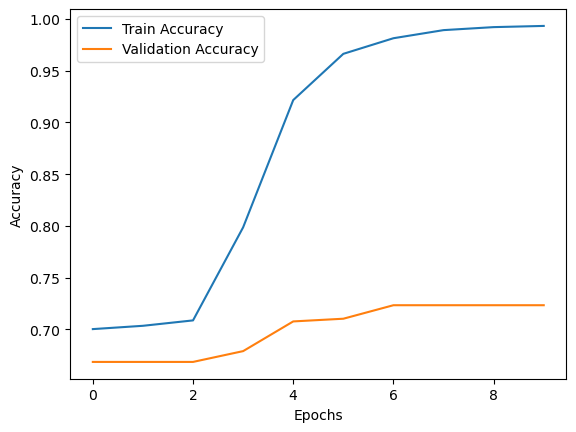

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

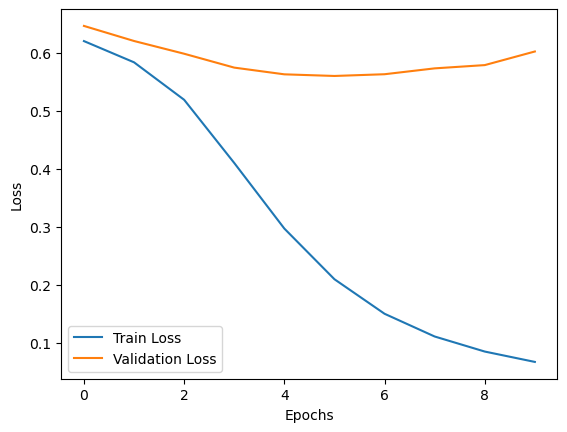

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(predicted_labels, val_labels)
print(classification_rep)

12/12 [==============================] - 0s 395us/step
              precision    recall  f1-score   support

           0       0.30      0.69      0.42        55
           1       0.93      0.73      0.82       328

    accuracy                           0.72       383
   macro avg       0.62      0.71      0.62       383
weighted avg       0.84      0.72      0.76       383



## TF-IDF 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(data['cleanText'].to_list())

In [22]:
features = tfidf_features.toarray()
labels = np.array(data['New Class'])

In [23]:
from sklearn.model_selection import train_test_split
train_sequences, val_sequences, train_labels, val_labels = train_test_split(features, labels, test_size=0.1, random_state=20)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(train_sequences.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2849536   
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2849793 (10.87 MB)
Trainable params: 2849793 (10.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=10, validation_data=(val_sequences, val_labels))

Epoch 1/10
108/108 [==============================] - 1s 5ms/step - loss: 0.6000 - accuracy: 0.6943 - val_loss: 0.5199 - val_accuracy: 0.7415
Epoch 2/10
108/108 [==============================] - 1s 5ms/step - loss: 0.4281 - accuracy: 0.7948 - val_loss: 0.4387 - val_accuracy: 0.8120
Epoch 3/10
108/108 [==============================] - 1s 5ms/step - loss: 0.2182 - accuracy: 0.9364 - val_loss: 0.4733 - val_accuracy: 0.7937
Epoch 4/10
108/108 [==============================] - 1s 5ms/step - loss: 0.1035 - accuracy: 0.9794 - val_loss: 0.5418 - val_accuracy: 0.7859
Epoch 5/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0561 - accuracy: 0.9907 - val_loss: 0.5851 - val_accuracy: 0.7807
Epoch 6/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0358 - accuracy: 0.9942 - val_loss: 0.6198 - val_accuracy: 0.7755
Epoch 7/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0262 - accuracy: 0.9951 - val_loss: 0.6612 - val_accuracy: 0.7702
Epoch 

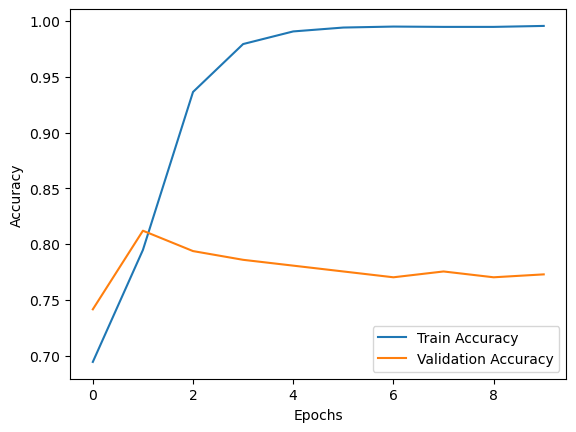

In [27]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

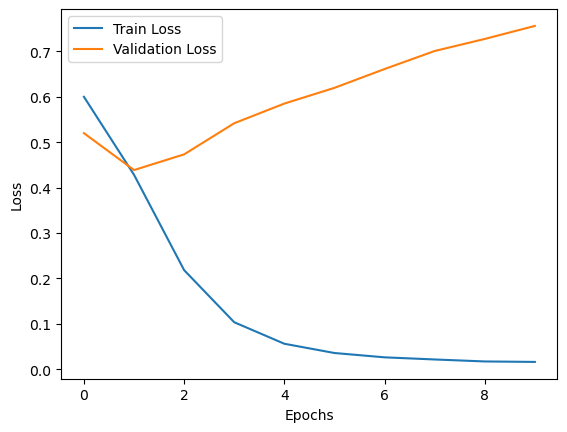

In [28]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
predictions = model.predict(val_sequences)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(predicted_labels, val_labels)
print(classification_rep)

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        81
           1       0.88      0.82      0.85       302

    accuracy                           0.77       383
   macro avg       0.68      0.71      0.69       383
weighted avg       0.80      0.77      0.78       383



## N-Grams

### 2-Grams

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['cleanText'], np.array(data['New Class']), test_size=0.1, random_state=20)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(2, 2))

In [32]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                831216    
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 831233 (3.17 MB)
Trainable params: 831233 (3.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=10, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/10
108/108 [==============================] - 1s 6ms/step - loss: 0.6249 - accuracy: 0.6903 - val_loss: 0.5482 - val_accuracy: 0.7415
Epoch 2/10
108/108 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.7820 - val_loss: 0.5171 - val_accuracy: 0.7493
Epoch 3/10
108/108 [==============================] - 0s 4ms/step - loss: 0.2015 - accuracy: 0.9681 - val_loss: 0.5228 - val_accuracy: 0.7363
Epoch 4/10
108/108 [==============================] - 0s 4ms/step - loss: 0.0875 - accuracy: 0.9910 - val_loss: 0.5395 - val_accuracy: 0.7337
Epoch 5/10
108/108 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9927 - val_loss: 0.5537 - val_accuracy: 0.7415
Epoch 6/10
108/108 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9927 - val_loss: 0.5690 - val_accuracy: 0.7311
Epoch 7/10
108/108 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9930 - val_loss: 0.5824 - val_accuracy: 0.7285
Epoch 

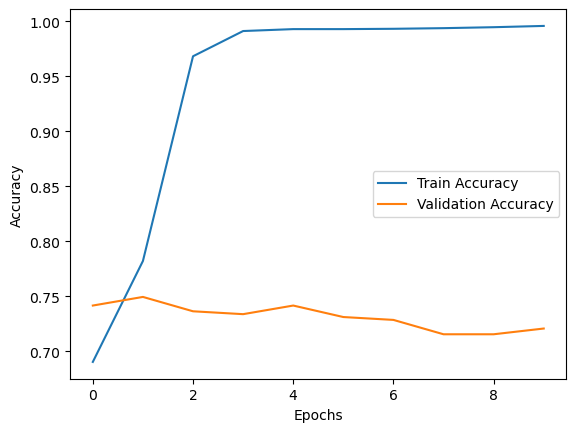

In [36]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

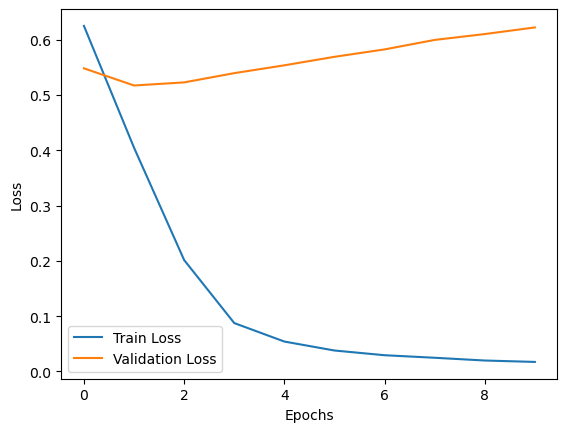

In [37]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
predictions = model.predict(test_vectors)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(predicted_labels, test_labels)
print(classification_rep)

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.38      0.47      0.42        83
           1       0.84      0.79      0.82       300

    accuracy                           0.72       383
   macro avg       0.61      0.63      0.62       383
weighted avg       0.74      0.72      0.73       383



### 3-Grams

In [39]:
vectorizer = CountVectorizer(ngram_range=(3,3))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(3, 3))

In [40]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                1087952   
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1087969 (4.15 MB)
Trainable params: 1087969 (4.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=10, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/10
108/108 [==============================] - 1s 8ms/step - loss: 0.6400 - accuracy: 0.6911 - val_loss: 0.5755 - val_accuracy: 0.7389
Epoch 2/10
108/108 [==============================] - 1s 5ms/step - loss: 0.3892 - accuracy: 0.7707 - val_loss: 0.5459 - val_accuracy: 0.7389
Epoch 3/10
108/108 [==============================] - 1s 5ms/step - loss: 0.1957 - accuracy: 0.9663 - val_loss: 0.5529 - val_accuracy: 0.7258
Epoch 4/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0810 - accuracy: 0.9919 - val_loss: 0.5615 - val_accuracy: 0.6919
Epoch 5/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0486 - accuracy: 0.9939 - val_loss: 0.5734 - val_accuracy: 0.6893
Epoch 6/10
108/108 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9930 - val_loss: 0.5813 - val_accuracy: 0.6893
Epoch 7/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9945 - val_loss: 0.5875 - val_accuracy: 0.6919
Epoch 

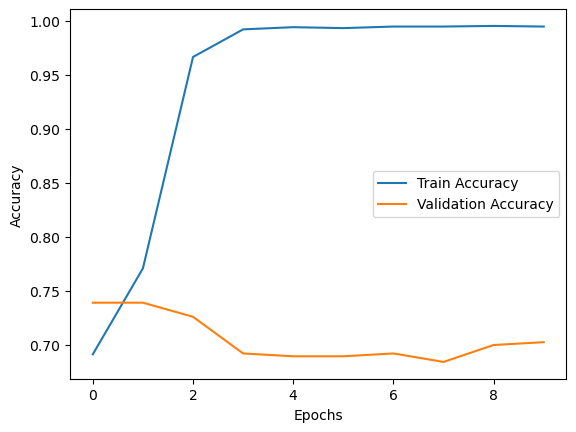

In [44]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

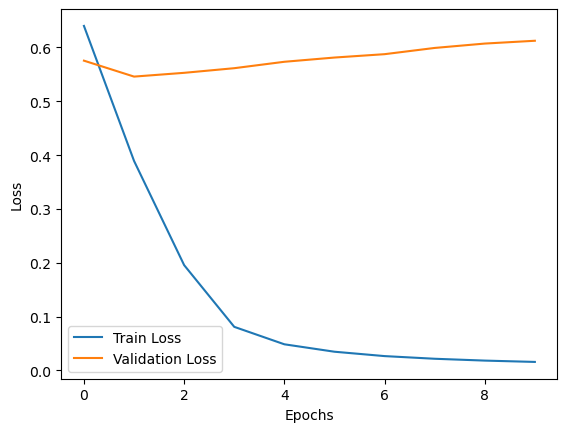

In [45]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
predictions = model.predict(test_vectors)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(predicted_labels, test_labels)
print(classification_rep)

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.43      0.44      0.44       100
           1       0.80      0.80      0.80       283

    accuracy                           0.70       383
   macro avg       0.62      0.62      0.62       383
weighted avg       0.70      0.70      0.70       383



## FastText

In [47]:
import fasttext

ft = fasttext.load_model('../../fasttext/cc.id.300.bin')

In [48]:
vocab_size = len(tokenizer.word_index) + 1

In [49]:
embedding_dim = 300  # Dimensionality of the word embeddings

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in ft:
        embedding_matrix[i] = ft[word]

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 58, 300)           3345600   
                                                                 
 bidirectional (Bidirection  (None, 58, 128)           186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3573761 (13.63 MB)
Trainable params: 228161 (891.25 KB)
Non-trainable params: 3345600 (12.76 MB)
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['New Class']), test_size=0.1, random_state=20)

In [53]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/10
108/108 [==============================] - 18s 137ms/step - loss: 0.6160 - accuracy: 0.6932 - val_loss: 0.5713 - val_accuracy: 0.7337
Epoch 2/10
108/108 [==============================] - 18s 171ms/step - loss: 0.6056 - accuracy: 0.6952 - val_loss: 0.5657 - val_accuracy: 0.7337
Epoch 3/10
108/108 [==============================] - 18s 171ms/step - loss: 0.5870 - accuracy: 0.7028 - val_loss: 0.5418 - val_accuracy: 0.7363
Epoch 4/10
108/108 [==============================] - 18s 170ms/step - loss: 0.5733 - accuracy: 0.7042 - val_loss: 0.5287 - val_accuracy: 0.7415
Epoch 5/10
108/108 [==============================] - 18s 169ms/step - loss: 0.5647 - accuracy: 0.7071 - val_loss: 0.5248 - val_accuracy: 0.7389
Epoch 6/10
108/108 [==============================] - 18s 170ms/step - loss: 0.5677 - accuracy: 0.7109 - val_loss: 0.5270 - val_accuracy: 0.7493
Epoch 7/10
108/108 [==============================] - 19s 178ms/step - loss: 0.5521 - accuracy: 0.7155 - val_loss: 0.5130 - val_ac

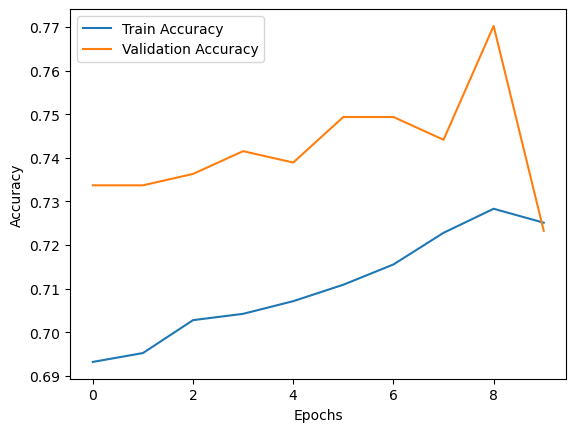

In [54]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

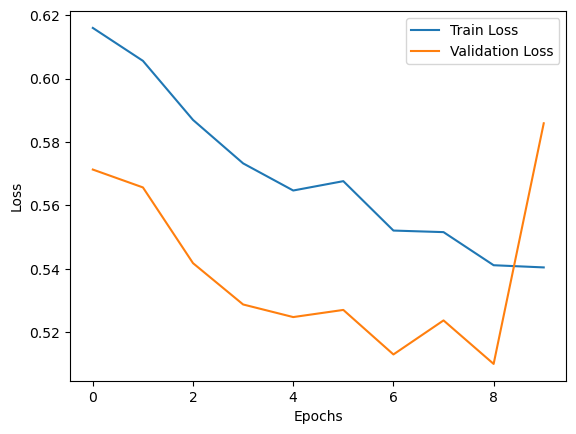

In [55]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
predictions = model.predict(val_sequences)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(predicted_labels, val_labels)
print(classification_rep)

12/12 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       0.56      0.48      0.52       118
           1       0.78      0.83      0.81       265

    accuracy                           0.72       383
   macro avg       0.67      0.66      0.66       383
weighted avg       0.71      0.72      0.72       383



## BPE (Byte-Pair Encoding)

In [57]:
from bpemb import BPEmb

bpe_id = BPEmb(lang='id', vs=100000, dim=100)

In [58]:
embedding_matrix = data['cleanText'].apply(bpe_id.encode_ids)

In [59]:
max_length = max(embedding_matrix.apply(len))
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(embedding_matrix, maxlen=max_length)

In [60]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(bpe_id.vectors.shape[0], bpe_id.vectors.shape[1], input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 71, 100)           10000000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 71, 128)           84480     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10125761 (38.63 MB)
Trainable params: 10125761 (38.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['New Class']), test_size=0.1, random_state=20)

In [62]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=5, validation_data=(val_sequences, val_labels))

Epoch 1/5
108/108 [==============================] - 20s 154ms/step - loss: 0.6194 - accuracy: 0.6958 - val_loss: 0.5585 - val_accuracy: 0.7337
Epoch 2/5
108/108 [==============================] - 19s 180ms/step - loss: 0.5056 - accuracy: 0.7538 - val_loss: 0.4825 - val_accuracy: 0.7885
Epoch 3/5
108/108 [==============================] - 20s 181ms/step - loss: 0.3178 - accuracy: 0.8642 - val_loss: 0.5349 - val_accuracy: 0.7624
Epoch 4/5
108/108 [==============================] - 20s 181ms/step - loss: 0.2156 - accuracy: 0.9196 - val_loss: 0.6774 - val_accuracy: 0.7128
Epoch 5/5
108/108 [==============================] - 19s 180ms/step - loss: 0.1378 - accuracy: 0.9518 - val_loss: 0.6975 - val_accuracy: 0.7493


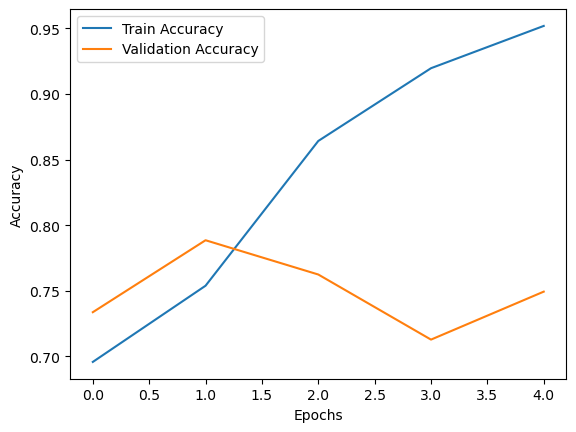

In [64]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

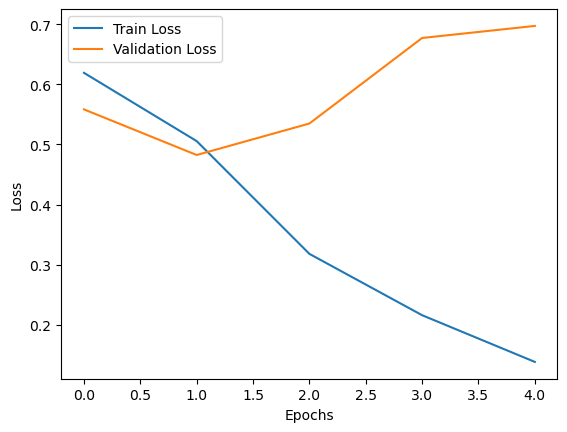

In [65]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(val_labels, predicted_labels)
print(classification_rep)

12/12 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       102
           1       0.84      0.81      0.83       281

    accuracy                           0.75       383
   macro avg       0.68      0.69      0.69       383
weighted avg       0.76      0.75      0.75       383



## GloVe + Bidirectional LSTM

In [67]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [68]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [69]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [70]:
glove_file = '../../glove/glove.twitter.27B.200d.txt'
embeddings_index = {}
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddings = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embeddings

In [71]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [72]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 58, 200)           2230400   
                                                                 
 bidirectional_4 (Bidirecti  (None, 58, 128)           135680    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2407361 (9.18 MB)
Trainable params: 176961 (691.25 KB)
Non-trainable params: 2230400 (8.51 MB)
_________________________________________________________________


In [73]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['New Class']), test_size=0.1, random_state=20)

In [74]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=10, validation_data=(val_sequences, val_labels))

Epoch 1/10
108/108 [==============================] - 16s 122ms/step - loss: 0.6233 - accuracy: 0.6940 - val_loss: 0.5762 - val_accuracy: 0.7337
Epoch 2/10
108/108 [==============================] - 15s 141ms/step - loss: 0.6106 - accuracy: 0.6923 - val_loss: 0.5722 - val_accuracy: 0.7337
Epoch 3/10
108/108 [==============================] - 15s 141ms/step - loss: 0.6032 - accuracy: 0.6940 - val_loss: 0.5438 - val_accuracy: 0.7337
Epoch 4/10
108/108 [==============================] - 15s 142ms/step - loss: 0.5970 - accuracy: 0.6938 - val_loss: 0.5407 - val_accuracy: 0.7337
Epoch 5/10
108/108 [==============================] - 16s 147ms/step - loss: 0.5896 - accuracy: 0.6932 - val_loss: 0.5263 - val_accuracy: 0.7311
Epoch 6/10
108/108 [==============================] - 15s 143ms/step - loss: 0.5870 - accuracy: 0.6940 - val_loss: 0.5536 - val_accuracy: 0.7337
Epoch 7/10
108/108 [==============================] - 15s 143ms/step - loss: 0.5870 - accuracy: 0.6938 - val_loss: 0.5249 - val_ac

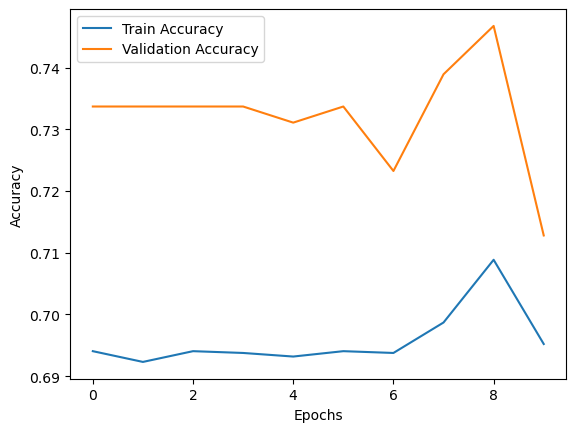

In [76]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

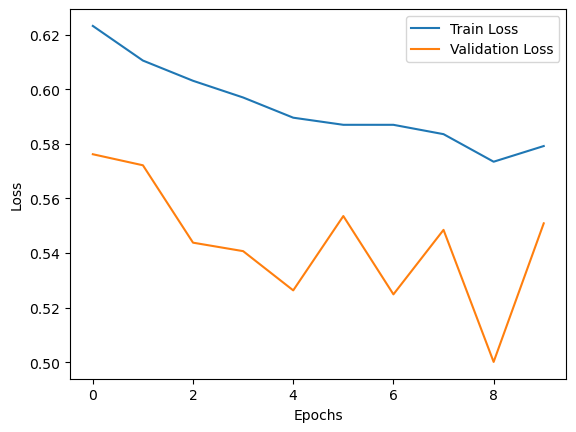

In [77]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = (predictions > 0.5).astype(int)

classification_rep = classification_report(val_labels, predicted_labels)
print(classification_rep)

12/12 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       102
           1       0.80      0.81      0.81       281

    accuracy                           0.71       383
   macro avg       0.63      0.62      0.63       383
weighted avg       0.71      0.71      0.71       383

